In [1]:
import pickle as p
with open('/home/frank/Downloads/data_paper.pickle','rb') as f:
    data=p.load(f)

In [3]:
###################
### Sklearn-LDA####
###################
n_samples = 1605
n_features = 1000
n_components = 10 #topic number
n_top_words = 20 #most frequent txn
#### tf ######
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
def dummy(doc):
    return doc
tf=CountVectorizer(tokenizer=dummy,preprocessor=dummy,
                                   max_features=n_features)  
tf_df=tf.fit_transform(data)
###### tf-idf #####
tfidf=TfidfVectorizer(tokenizer=dummy,preprocessor=dummy,
                                   max_features=n_features)
tfidf_df=tfidf.fit_transform(data)


In [5]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([str(feature_names[i])
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [28]:
####LDA#####
from time import time
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=n_components, max_iter=4,
                                learning_offset=42.,
                                random_state=0)
t0 = time()
lda.fit(tf_df)
tf_feature_names = tf.get_feature_names()
print("done in %0.5fs." % (time() - t0))
print("\nTopics in LDA model:")
print_top_words(lda, tf_feature_names, n_top_words)

done in 0.83981s.

Topics in LDA model:
Topic #0: 526 3182 20 3 15748 2 14 18 1 192550 13 0 193185 6 5 4 16 50250 12 193187
Topic #1: 8785 10031 6024 62645 917 13496 192449 193430 1776 357563 357562 192791 3939 300407 483 300405 494 1803 193121 11658
Topic #2: 459 132520 441 457 16092 5306 16095 203829 203830 8479 192499 6046 193134 1841 1747 7176 205079 356821 891 192494
Topic #3: 1340 900 2487 5331 15761 7143 2560 3902 1373 5361 4995 193706 194132 7537 5358 5311 4639 13827 1765 135524
Topic #4: 905 357691 171223 184876 1781 926 1791 5669 22975 487 155150 1372 464 474 1335 1792 471 14150 155541 1761
Topic #5: 486 471 1381 501 155301 5689 192895 192893 3224 1372 27418 98982 9206 7849 130988 4623 4994 42422 165926 357359
Topic #6: 1335 487 464 471 474 1372 486 905 4596 1781 926 9959 1791 1871 193208 2615 5669 39541 17110 154916
Topic #7: 2048 179 639 642 175 173 257 192611 247 174 172364 192663 690 357306 259 192609 192686 357305 193982 173523
Topic #8: 1372 161755 487 155442 1781 900 1

In [29]:
t0 = time()
lda.fit(tfidf_df)
tfidf_feature_names = tfidf.get_feature_names()
print("done in %0.5fs." % (time() - t0))
print("\nTopics in LDA model:")
print_top_words(lda, tfidf_feature_names, n_top_words)

done in 0.65586s.

Topics in LDA model:
Topic #0: 900 20 1340 14 2560 3 13 6 1765 12 0 4 21 16 1 2 18 5311 25 5
Topic #1: 487 5311 42422 13827 892 19220 494 2560 471 1335 22975 1791 1372 1781 5669 184876 464 1340 926 486
Topic #2: 184876 357691 161755 4481 129293 5045 487 5311 1340 471 192644 1372 486 21 474 464 926 171223 1335 1781
Topic #3: 171223 1340 487 22975 1792 1335 1761 5331 3836 12227 3958 1373 2560 51449 5679 900 1372 464 494 474
Topic #4: 474 905 1372 464 487 1781 1335 471 356766 174295 171223 2487 2048 8785 10031 494 179 6024 7143 639
Topic #5: 1372 471 487 1781 486 1791 905 474 1335 464 926 165926 5669 155442 155301 154916 14150 526 1381 3182
Topic #6: 464 1335 487 474 471 486 1340 1372 154916 155541 155150 155442 900 184876 905 1781 1765 2560 1791 171223
Topic #7: 15761 3902 4995 7850 3904 201084 11396 7524 494 192644 5311 1765 3958 2560 155150 1791 155301 22975 1781 900
Topic #8: 1335 926 487 5669 1781 14150 905 464 1372 474 1791 471 4596 27418 295152 193208 39541 486 3

In [30]:
###################
#### Gensim-LDA####
###################
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from pprint import pprint
data=[[str(word) for word in doc] for doc in data]
id2word=corpora.Dictionary(data)
corpus = [id2word.doc2bow(text) for text in data]
t0=time()
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=0,
                                           update_every=1,
                                           alpha='auto',
                                           per_word_topics=True)
print("done in %0.5fs." % (time() - t0))
pprint(lda_model.print_topics())

done in 4.20266s.
[(0,
  '0.004*"2048" + 0.003*"639" + 0.003*"179" + 0.002*"175" + 0.002*"173" + '
  '0.002*"642" + 0.002*"257" + 0.002*"247" + 0.001*"259" + 0.001*"174"'),
 (1,
  '0.003*"179" + 0.003*"2048" + 0.003*"642" + 0.002*"175" + 0.002*"639" + '
  '0.002*"173" + 0.002*"257" + 0.002*"459" + 0.001*"192611" + 0.001*"247"'),
 (2,
  '0.004*"2048" + 0.003*"179" + 0.002*"175" + 0.002*"639" + 0.002*"642" + '
  '0.002*"257" + 0.002*"173" + 0.001*"690" + 0.001*"1372" + 0.001*"172364"'),
 (3,
  '0.004*"2048" + 0.004*"179" + 0.003*"639" + 0.003*"175" + 0.003*"642" + '
  '0.003*"257" + 0.002*"173" + 0.002*"192611" + 0.002*"192663" + 0.001*"247"'),
 (4,
  '0.005*"487" + 0.004*"1335" + 0.004*"471" + 0.003*"464" + 0.003*"486" + '
  '0.003*"179" + 0.002*"639" + 0.002*"1340" + 0.002*"1372" + 0.002*"175"'),
 (5,
  '0.004*"2048" + 0.003*"642" + 0.003*"175" + 0.003*"257" + 0.003*"639" + '
  '0.002*"179" + 0.002*"173" + 0.002*"174" + 0.002*"357306" + 0.001*"172364"'),
 (6,
  '0.004*"2048" + 0.004*"1

In [31]:
# Compute Perplexity not use anymore!!!!!!
print('\nPerplexity: ', lda_model.log_perplexity(corpus))# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)#the bigger the better!


Perplexity:  -13.68500869080168

Coherence Score:  0.5041992481845272


In [32]:
def best_topic_num(dic,corpus,data,start,end,step):
    coherence_values = []
    model_list = []
    for num_topics in range(start,end, step):
        t0=time()
        model=gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dic,
                                           num_topics=num_topics , 
                                           random_state=0,
                                           update_every=1,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=data, dictionary=dic, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print('# %d is completed! This step costs %s sec'%(num_topics,str(time()-t0)))

    return model_list, coherence_values

In [33]:
#### best topic number #######
model_list, coherence_values = best_topic_num(dic=id2word, 
                                            corpus=corpus, 
                                            data=data, 
                                            start=3, 
                                            end=20, 
                                            step=1)

# 3 is completed! This step costs 11.128896236419678 sec
# 4 is completed! This step costs 11.135303735733032 sec
# 5 is completed! This step costs 12.031826496124268 sec
# 6 is completed! This step costs 11.516132354736328 sec
# 7 is completed! This step costs 12.396293640136719 sec
# 8 is completed! This step costs 11.344320297241211 sec
# 9 is completed! This step costs 12.399007558822632 sec
# 10 is completed! This step costs 12.60720705986023 sec
# 11 is completed! This step costs 13.357209205627441 sec
# 12 is completed! This step costs 13.816519498825073 sec
# 13 is completed! This step costs 12.697038650512695 sec
# 14 is completed! This step costs 12.947660684585571 sec
# 15 is completed! This step costs 13.171937465667725 sec
# 16 is completed! This step costs 13.15787386894226 sec
# 17 is completed! This step costs 13.437980651855469 sec
# 18 is completed! This step costs 13.6164710521698 sec
# 19 is completed! This step costs 13.758577346801758 sec


Num Topics = 3  has Coherence Value of 0.4974150748967336
Num Topics = 4  has Coherence Value of 0.5162920485746331
Num Topics = 5  has Coherence Value of 0.5315916547470753
Num Topics = 6  has Coherence Value of 0.5127777387117741
Num Topics = 7  has Coherence Value of 0.5065916710801253
Num Topics = 8  has Coherence Value of 0.4912007348762757
Num Topics = 9  has Coherence Value of 0.497478163325339
Num Topics = 10  has Coherence Value of 0.5041992481845272
Num Topics = 11  has Coherence Value of 0.5153631691166375
Num Topics = 12  has Coherence Value of 0.49952073976943256
Num Topics = 13  has Coherence Value of 0.49986405014359875
Num Topics = 14  has Coherence Value of 0.5137278866064817
Num Topics = 15  has Coherence Value of 0.5071254107599864
Num Topics = 16  has Coherence Value of 0.5093492025628987
Num Topics = 17  has Coherence Value of 0.5055254410124853
Num Topics = 18  has Coherence Value of 0.49596344716159696
Num Topics = 19  has Coherence Value of 0.501744276667346


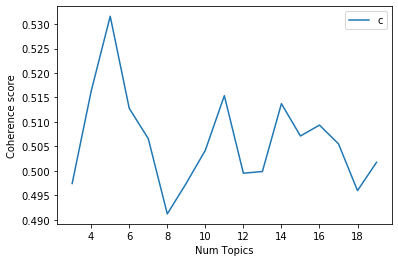

In [35]:
# Plotting tools
import matplotlib.pyplot as plt
%matplotlib inline
num_topic_range = range(3, 20, 1)
for x,y in zip(num_topic_range, coherence_values):
    print("Num Topics =", x, " has Coherence Value of", y)
plt.plot(num_topic_range, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [40]:
pprint(best_model.print_topics())

[(0,
  '0.004*"2048" + 0.003*"639" + 0.003*"179" + 0.002*"175" + 0.002*"642" + '
  '0.002*"173" + 0.002*"257" + 0.002*"247" + 0.001*"192611" + 0.001*"174"'),
 (1,
  '0.003*"2048" + 0.003*"179" + 0.003*"642" + 0.003*"639" + 0.002*"175" + '
  '0.002*"173" + 0.002*"459" + 0.002*"257" + 0.001*"192611" + 0.001*"247"'),
 (2,
  '0.005*"2048" + 0.003*"179" + 0.002*"639" + 0.002*"175" + 0.002*"642" + '
  '0.002*"257" + 0.002*"173" + 0.002*"459" + 0.002*"192611" + 0.001*"172364"'),
 (3,
  '0.004*"2048" + 0.003*"639" + 0.003*"179" + 0.003*"642" + 0.003*"175" + '
  '0.002*"257" + 0.002*"173" + 0.002*"192611" + 0.002*"192663" + 0.001*"247"'),
 (4,
  '0.003*"179" + 0.003*"639" + 0.003*"487" + 0.003*"1335" + 0.003*"471" + '
  '0.003*"642" + 0.003*"175" + 0.003*"173" + 0.003*"257" + 0.002*"2048"')]
